In [1]:
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [25]:
x_data = []
y_data = []
datacount = 0

for i in range(0,10):
    count = 0
    for j in os.listdir('input/Dataset/'+str(i)+'/'):
        img = Image.open('input/Dataset/'+str(i)+'/'+j).convert('L')
        img = img.resize((320,120))
        arr = np.array(img)
        x_data.append(arr)
        count+=1
    y_values = np.full((count,1),i)
    y_data.extend(y_values)
    datacount += count
x_data = np.array(x_data, dtype='float32')
y_data = np.array(y_data)
y_data = y_data.reshape(datacount,1)

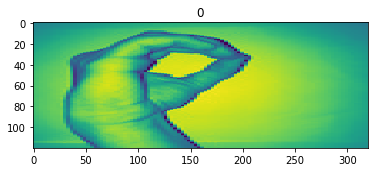

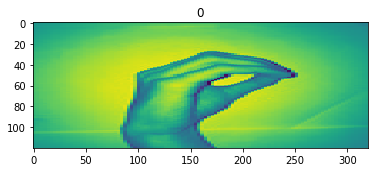

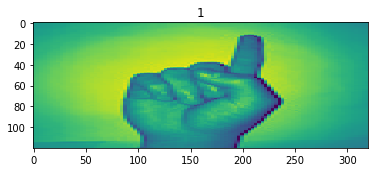

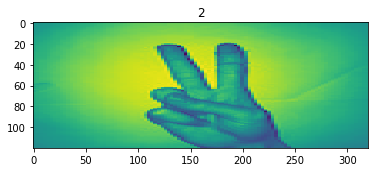

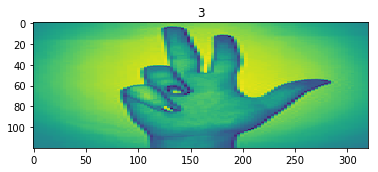

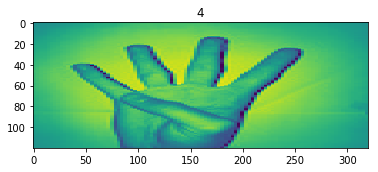

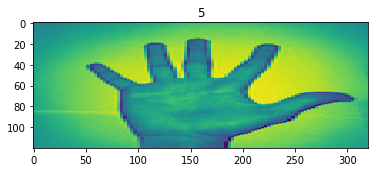

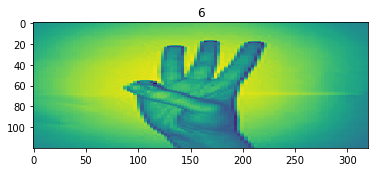

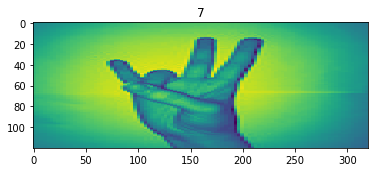

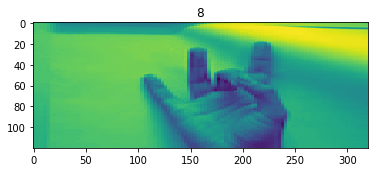

In [24]:
from random import randint
for i in range(0,10):
    plt.imshow(x_data[i*200,:,:])
    plt.title(y_data[i*200,0])
    plt.show()

In [26]:
import keras
from keras.utils import to_categorical
y_data = to_categorical(y_data)

Using TensorFlow backend.


In [27]:
x_data = x_data.reshape((datacount,120,320,1))
x_data/=255

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_further, y_train, y_further = train_test_split(x_data, y_data, test_size=0.2)
x_validate, x_test, y_validate, y_test = train_test_split(x_further, y_further, test_size=0.5)

In [29]:
from keras import layers, models

In [30]:
model = models.Sequential()
model.add(layers.Conv2D(32,(5,5), strides=(2,2),activation='relu',input_shape=(120,320,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [31]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=64, verbose=1, validation_data=(x_validate, y_validate))

Train on 1649 samples, validate on 206 samples
Epoch 1/10
1649/1649 [==============================] - 17s 11ms/step - loss: 2.1239 - acc: 0.2923 - val_loss: 1.5423 - val_acc: 0.5000
Epoch 2/10
1649/1649 [==============================] - 16s 10ms/step - loss: 1.0985 - acc: 0.6392 - val_loss: 1.1573 - val_acc: 0.6068
Epoch 3/10
1649/1649 [==============================] - 15s 9ms/step - loss: 0.7344 - acc: 0.7599 - val_loss: 0.7673 - val_acc: 0.7330
Epoch 4/10
1649/1649 [==============================] - 15s 9ms/step - loss: 0.5698 - acc: 0.8072 - val_loss: 0.6477 - val_acc: 0.7621
Epoch 5/10
1649/1649 [==============================] - 16s 9ms/step - loss: 0.4411 - acc: 0.8629 - val_loss: 0.6101 - val_acc: 0.7767
Epoch 6/10
1649/1649 [==============================] - 16s 9ms/step - loss: 0.3555 - acc: 0.8884 - val_loss: 0.5018 - val_acc: 0.8350
Epoch 7/10
1649/1649 [==============================] - 16s 10ms/step - loss: 0.2226 - acc: 0.9297 - val_loss: 0.6973 - val_acc: 0.7282
Epoch

In [32]:
[loss, acc] = model.evaluate(x_test,y_test,verbose=1)
print("Accuracy:" + str(acc))

207/207 [==============================] - 1s 3ms/step
Accuracy:0.7971014501391978


In [33]:
[loss, acc] = model.evaluate(x_test,y_test,verbose=1)
print("Accuracy:" + str(acc))

207/207 [==============================] - 1s 3ms/step
Accuracy:0.7971014501391978


In [37]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(x_test)
accuracy_score(y_test, y_pred.round())

0.782608695652174